In [35]:
from keras.datasets import mnist
import tensorflow as tf
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
(x_train_data, t_train_data), (x_test_data, t_test_data)=mnist.load_data()

In [9]:
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
print(t_train_data[0])

5


<function matplotlib.pyplot.show(close=None, block=None)>

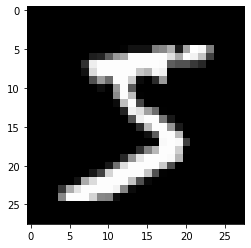

In [14]:
import matplotlib.pyplot as plt
img=x_train_data[0]
plt.imshow(img,cmap='gray')
plt.show

In [15]:
print(x_train_data[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

<function matplotlib.pyplot.show(close=None, block=None)>

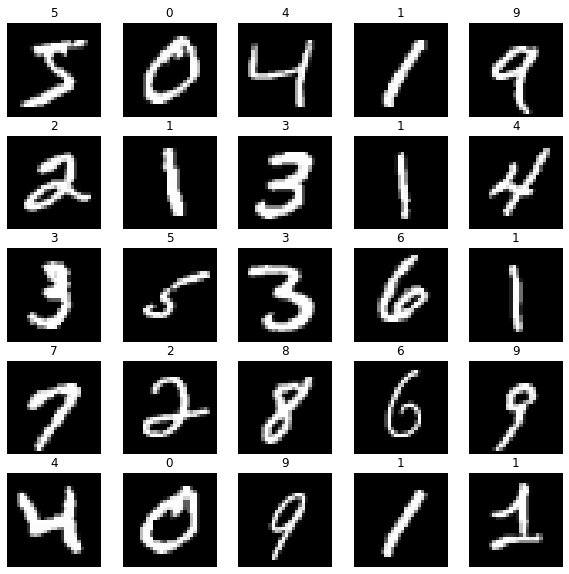

In [17]:
plt.figure(figsize=(10,10))
for index in range(0,25,1):
    plt.subplot(5,5,index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show

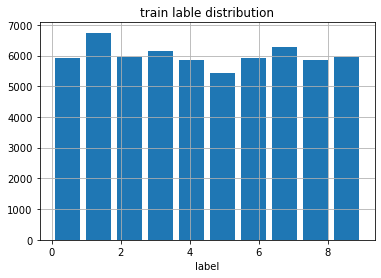

In [18]:
plt.title('train lable distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train_data, bins=10, rwidth=0.8)
plt.show()

In [21]:
label_list=np.zeros(10)
print(label_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
for idx in range(len(t_train_data)):
    label=int(t_train_data[idx])
    label_list[label]+=1
print(label_list)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [44]:
x_train=(x_train_data-0.0)/(255.0-0.0)

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [45]:
x_test=(x_test_data-0.0)/(255.0-0.0)
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
t_train_data[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [26]:
#(One Hot encoding)
t_train=tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test=tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [28]:
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [40]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist=model.fit(x_train, t_train, epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7681 - accuracy: 0.8097 - val_loss: 0.3900 - val_accuracy: 0.8978
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.9096 - val_loss: 0.2981 - val_accuracy: 0.9182
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9248 - val_loss: 0.2610 - val_accuracy: 0.9269
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2407 - accuracy: 0.9328 - val_loss: 0.2369 - val_accuracy: 0.9336
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2162 - accuracy: 0.9391 - val_loss: 0.2183 - val_accuracy: 0.9395
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1969 - accuracy: 0.9440 - val_loss: 0.2042 - val_accuracy: 0.9414
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1804 - accuracy: 0.9486 - val_loss: 0.1927 - val_accuracy:

In [46]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 754us/step - loss: 0.0952 - accuracy: 0.9713


[0.09522216022014618, 0.9713000059127808]

In [47]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 641us/step


In [50]:
print(predictions[0])
print(t_test[0])

[1.3010538e-06 1.3347289e-08 9.3256000e-05 8.6335642e-03 2.4187599e-07
 1.6089882e-06 1.3278316e-09 9.9120188e-01 2.0974929e-05 4.7190439e-05]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [51]:
label=np.argmax(predictions[0])
print(label)

7


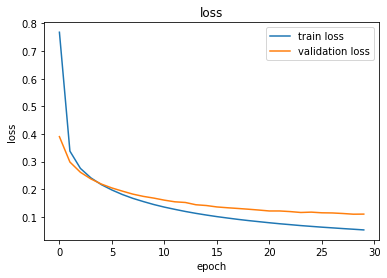

In [52]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

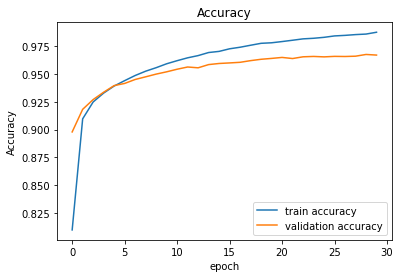

In [54]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
plt.figure(figsize=(6,6))

cm=confusion_matrix(np.argmax(t_test, axis=-1),
                   np.argmax(predictions, axis=-1))
cm


array([[ 968,    0,    1,    2,    1,    0,    5,    1,    1,    1],
       [   0, 1124,    2,    2,    0,    1,    2,    1,    3,    0],
       [   6,    2, 1001,    1,    2,    1,    3,    5,   11,    0],
       [   0,    0,    4,  985,    0,    5,    0,    7,    6,    3],
       [   3,    0,    2,    1,  954,    0,    6,    4,    2,   10],
       [   3,    0,    0,   15,    1,  857,    6,    1,    7,    2],
       [   4,    3,    2,    1,    4,    3,  938,    1,    2,    0],
       [   1,    6,   12,    8,    2,    1,    0,  991,    2,    5],
       [   4,    2,    4,   11,    6,    3,    2,    7,  932,    3],
       [   3,    5,    2,   10,   11,    3,    0,    8,    4,  963]],
      dtype=int64)

<Figure size 432x432 with 0 Axes>

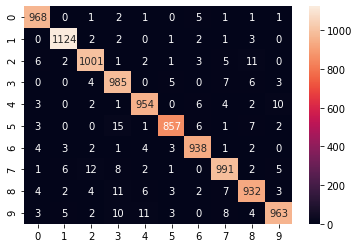

In [60]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()